**Introduction**

The COVID-19 outbreak has caused many US states to shut down most economic activity which is severely hurting our economy. Politicians and leaders in office are under pressure to open the country back up again or face a severe lasting economic crisis and potential long-term hardship. The goal of this project is to track the spread of coronavirus through Texas starting from a specific city and also to find the shortest path from Corpus Christi, where a potential vaccine from another country is being imported, to a city with the greatest need for a vaccine. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue
import geopy.distance
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Data**

The main data we will be using is coming from The University of Texas at San Antonio Computer Science department. This data contains city and distance information for all of the cities in Texas. I will also be using some location data from Foursquare.


In [2]:
# Load the graph data from the files
basePath = "/content/drive/My Drive/Colab Notebooks/"
cities_cols = ['city', 'y', 'x']
dist_cols = ['city1', 'city2', 'distance']

df_cities = pd.read_csv(basePath + "cities.csv", header=None, names=cities_cols)
df_dist = pd.read_csv(basePath + "distances.csv", header=None, names=dist_cols)

df_cities_plot = df_cities
df_cities_plot = df_cities_plot.set_index(df_cities_plot.city, drop=True)
df_cities_plot = df_cities_plot.drop('city', axis=1)

print(df_dist)

              city1            city2    distance
0        San Angelo          Midland  112.283423
1        San Angelo          Lubbock  185.113579
2        San Angelo          Abilene   95.269070
3        San Angelo      San Antonio  210.849482
4       San Antonio    New Braunfels   30.808767
5       San Antonio           Seguin   33.992046
6       San Antonio     Three Rivers   74.509098
7       San Antonio           Uvalde   82.709939
8            Austin       San Marcos   30.717426
9            Austin       Round Rock   18.464010
10           Austin  College Station  106.758822
11           Austin          Houston  165.907654
12           Temple             Waco   35.942526
13  College Station             Waco   97.827871
14  College Station          Houston   99.209177
15          Houston         Beaumont   99.579513
16          Houston        Galveston   65.021400
17          Houston         Columbus   72.515122
18          Houston       Sugar Land   59.135783
19         Victoria 

**Methodology**

I began by loading all of the data into the notebook. Once I had the data loaded, I labelled the columns so they were easier to understand and reference. After the data was ready to be used, I graphed the data and overlaid it on an outline of a Texas map, so we are able to get the big picture of how the cities are connected. I wrote a function to perform an uninformed search on the data. This function is compatible with Depth First Search and Breadth First Search. In our case we started with Three Rivers, but this method can be used with any other city listed in the dataset. This function returns the entire path of the virus spread and the total distance travelled in order for the virus to reach ever city. In my project, I ran the function using both DFS and BFS. After this function, I created 2 functions to help figure out an informed search strategy on the data so I could determine the best path for the vaccine to take from Corpus Christi to Amarillo. As with the uninformed search function, this one can also use different city combinations. This function returns the path followed and the distance it took just like the uninformed search function.


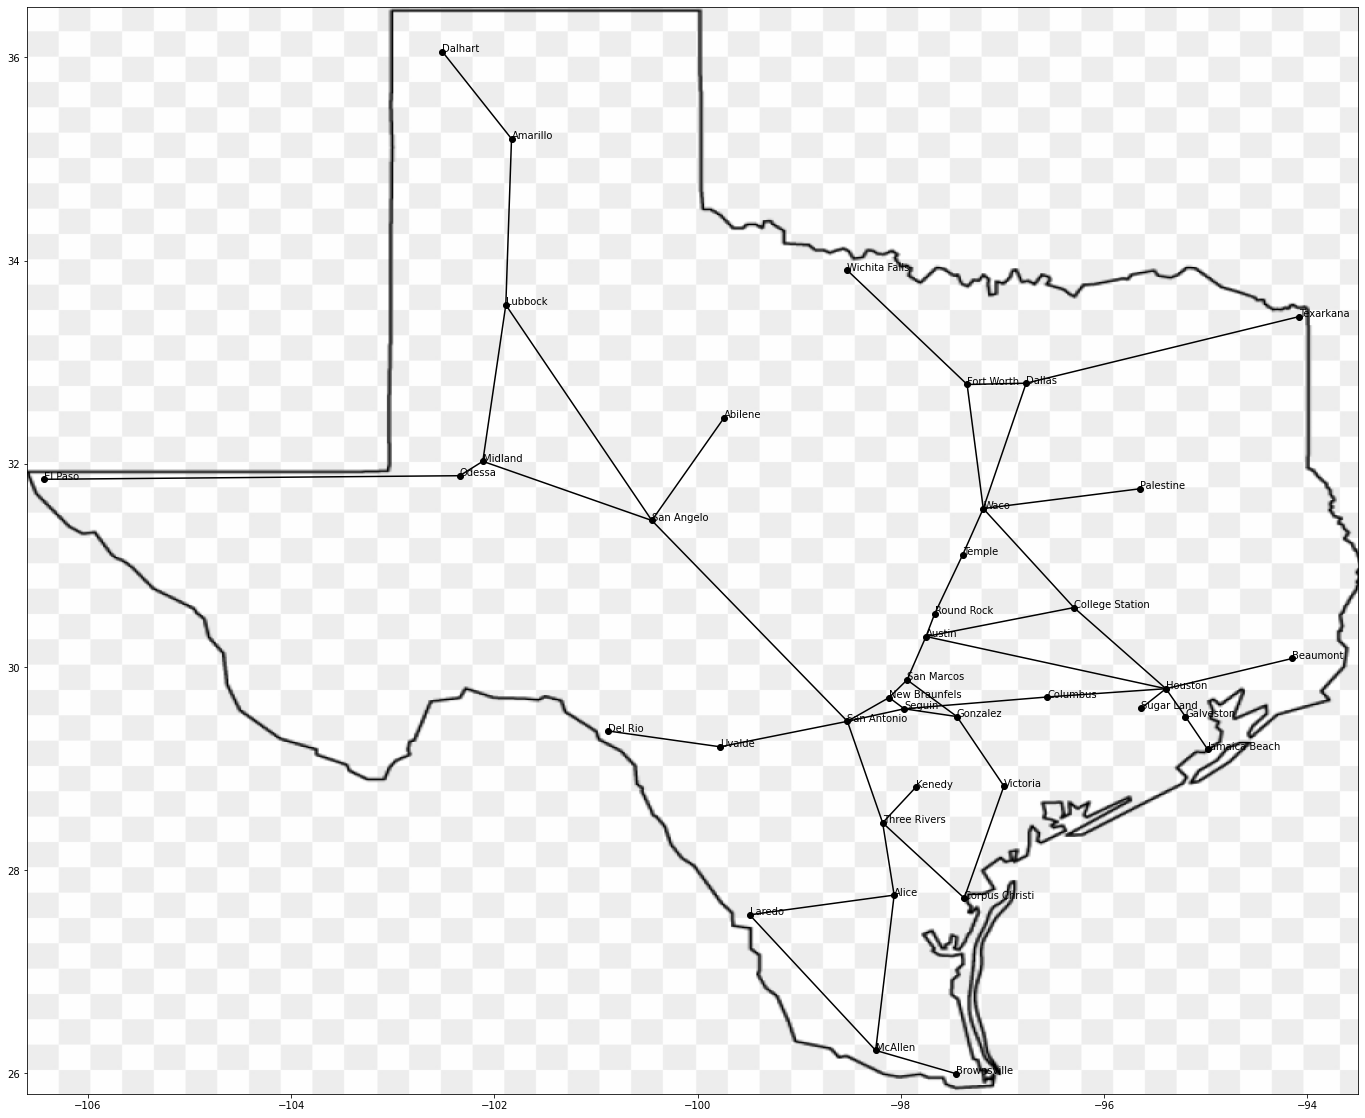

In [4]:
# Display a 2D graph of the given data
def graph():
    f, ax = plt.subplots(figsize = (28,20))
    img = plt.imread(basePath + "texas-map.png", 0)
    ax.imshow(img, extent = [-106.6, -93.5, 25.8, 36.5])
    plt.scatter(x=df_cities_plot.x, y=df_cities_plot.y, color='black')
    for index, row in df_cities_plot.iterrows():
        ax.annotate(index, xy=(row.x,row.y))
    
    for index, row in df_dist.iterrows():
        tmp1 = df_cities_plot[row['city1']==df_cities_plot.index]
        tmp2 = df_cities_plot[row['city2']==df_cities_plot.index]
        ax.plot([tmp1.x, tmp2.x], [tmp1.y,tmp2.y], color = 'black')
    
    plt.show()

def midpoint(df1, df2):
    x = (df1.x.item() + df2.x.item()) / 2
    y = (df1.y.item() + df2.y.item()) / 2
    return x,y

def print_path(header, l):
    print(header)
    i = 0
    for x in l:
      print(' %d, %s' %(i,x))
      i+=1

graph()

Spread Of Coronavirus through Texas starting from Three Rivers

In [ ]:
# Uninformed search strategy for spread of coronavirus starting from "Three Rivers"

vs_path = []

def uninformedSearch(df, start, idx):
    vs_path.clear()
    df['visited'] = False
    stack = [start]
    distances = [0]
    totDistance = 0
    while stack:
        vertex = stack.pop(idx)
        totDistance += distances.pop(idx)
        df.at[vertex, 'visited'] = True
        tmp = df_dist[df_dist['city1']==vertex]['city2'].tolist()
        tmp.extend(df_dist[df_dist['city2']==vertex]['city1'].tolist())
        for item in tmp:
            if df_cities_plot.at[item, 'visited']==False:
                if item not in stack:
                    stack.append(item)
                    if len(df_dist[df_dist['city1']==vertex][df_dist['city2']==item]['distance'].values) != 0:
                        distances.append(df_dist[df_dist['city1']==vertex][df_dist['city2']==item]['distance'].values[0])
                    else:
                        distances.append(df_dist[df_dist['city2']==vertex][df_dist['city1']==item]['distance'].values[0])
        vs_path.append(vertex)
    print_path("Virus Spread Path: ", vs_path)
    print("Total Distance Travelled = " + str(totDistance))

DFS = -1
BFS = 0

# search using Depth First Search
uninformedSearch(df_cities_plot, 'Three Rivers', DFS)
print('\n')
# search using Breadth First Search
uninformedSearch(df_cities_plot, 'Three Rivers', BFS)

Virus Spread Path: 
 0, Three Rivers
 1, Alice
 2, McAllen
 3, Brownsville
 4, Laredo
 5, Corpus Christi
 6, Victoria
 7, Gonzalez
 8, San Marcos
 9, Austin
 10, Houston
 11, Sugar Land
 12, Columbus
 13, Galveston
 14, Jamaica Beach
 15, Beaumont
 16, College Station
 17, Waco
 18, Temple
 19, Dallas
 20, Texarkana
 21, Fort Worth
 22, Wichita Falls
 23, Palestine
 24, Round Rock
 25, New Braunfels
 26, Seguin
 27, San Antonio
 28, San Angelo
 29, Abilene
 30, Lubbock
 31, Amarillo
 32, Dalhart
 33, Midland
 34, Odessa
 35, El Paso
 36, Uvalde
 37, Del Rio
 38, Kenedy
Total Distance Travelled = 3454.6133905600004


Virus Spread Path: 
 0, Three Rivers
 1, Kenedy
 2, San Antonio
 3, Corpus Christi
 4, Alice
 5, New Braunfels
 6, Seguin
 7, Uvalde
 8, San Angelo
 9, Victoria
 10, Laredo
 11, McAllen
 12, San Marcos
 13, Gonzalez
 14, Columbus
 15, Del Rio
 16, Midland
 17, Lubbock
 18, Abilene
 19, Brownsville
 20, Austin
 21, Houston
 22, Odessa
 23, Amarillo
 24, Round Rock
 25, Colle

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Vaccine Distribution from Corpus Christi to Amarillo

In [16]:
# Informed search strategy for distributing the vaccine from 'Corpus Christi' to 'Amarillo'

def SLD(city1, city2):
    tmp1 = df_cities[df_cities['city']==city1].values[0][1:3]
    tmp2 = df_cities[df_cities['city']==city2].values[0][1:3]
    v = geopy.distance.vincenty(tmp1, tmp2).miles
    return v

def informedSearch(df, start, goal, typ):
    vd_path = []
    df['visited'] = False
    q = PriorityQueue()
    h = SLD(start, goal)
    q.put((h, start, 0, 0, [start]))
    totDistance = 0
    print("\nNodes Visited ")
    while not q.empty():
        nextNode = q.get()
        vertex = nextNode[1]
        print("\t" + vertex)
        totDistance = (totDistance + nextNode[2]) if typ == 0 else nextNode[3]
        vd_path = nextNode[4].copy()
        if vertex == goal:
          break
        df.at[vertex, 'visited'] = True
        tmp = df_dist[df_dist['city1']==vertex]['city2'].tolist()
        tmp.extend(df_dist[df_dist['city2']==vertex]['city1'].tolist())
        vd2 = []
        for item in tmp:
            vd2 = vd_path.copy()
            if len(df_dist[df_dist['city1']==vertex][df_dist['city2']==item]['distance'].values) != 0:
                c = df_dist[df_dist['city1']==vertex][df_dist['city2']==item]['distance'].values[0]
            else:
                c = df_dist[df_dist['city2']==vertex][df_dist['city1']==item]['distance'].values[0]
            h = SLD(item, goal)
            vd2.append(item)
            newQ = (h + (0 if typ == 0 else c + nextNode[3]), item, c, nextNode[3] + c, vd2)
            if typ == 1 or (typ == 0 and not any(item in t for t in q.queue)):
                q.put(newQ)
    print_path("Vaccine Distribution Path: ", vd_path)
    print("Total Distance Travelled = " + str(totDistance))

GBFS = 0
ASTAR = 1

informedSearch(df_cities_plot, 'Corpus Christi', 'Amarillo', GBFS)
informedSearch(df_cities_plot, 'Corpus Christi', 'Amarillo', ASTAR)


Nodes Visited 
	Corpus Christi
	Three Rivers
	San Antonio
	San Angelo
	Lubbock
	Amarillo
Vaccine Distribution Path: 
 0, Corpus Christi
 1, Three Rivers
 2, San Antonio
 3, San Angelo
 4, Lubbock
 5, Amarillo
Total Distance Travelled = 674.63197221

Nodes Visited 
	Corpus Christi
	Three Rivers
	San Antonio
	Victoria
	Kenedy
	Gonzalez
	New Braunfels
	San Marcos
	Seguin
	New Braunfels
	Austin
	San Marcos
	Seguin
	San Angelo
	New Braunfels
	Round Rock
	New Braunfels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



	San Marcos
	Austin
	Seguin
	New Braunfels
	San Marcos
	San Antonio
	Round Rock
	San Antonio
	Three Rivers
	Austin
	New Braunfels
	San Marcos
	Seguin
	San Antonio
	San Antonio
	Lubbock
	New Braunfels
	Austin
	San Marcos
	Uvalde
	Seguin
	Round Rock
	San Antonio
	New Braunfels
	Austin
	Austin
	New Braunfels
	Temple
	Seguin
	San Marcos
	Amarillo
Vaccine Distribution Path: 
 0, Corpus Christi
 1, Three Rivers
 2, San Antonio
 3, San Angelo
 4, Lubbock
 5, Amarillo
Total Distance Travelled = 674.63197221


**Results**

Our first image, the map outline of Texas, is provided so you can see all of the cities listed in our dataset and see how all of them are connected so you can understand the path results we received from our search functions. 

For our uninformed search function, we first tried it starting from Three Rivers and we used Depth First Search. This gave us our total distance calculation to spread from Three Rivers to every other city in Texas in the shortest path using Depth First Search. However, we ran the same function again using Breadth First Search and ended up with a shorter distance and a different path. 

For our informed search function, we started at Corpus Christi and ended in Amarillo. The goal of this was to determine the shortest path from Corpus Christi to Amarillo. We started by performing a Greedy Best First Search on the data and came up with a total distance of 674.63. Then, we performed an A* search on the same data and came up with the same total distance. The only difference between the two search algorithms is that the A* checked every node to make sure it was taking the best path, while the Greedy Best First Search only chose nodes with the best immediately available path. 

**Discussion**

For our uninformed search, we can see different paths and different distances calculated as a result of those different paths. The reason for this is because Breadth First Search visits each of its child nodes before exploring deeper, whereas Depth First Search is the opposite. This causes our algorithm to pick a different order of cities to visit even though the data is the same. For our current data set, we have determined that the best fitting algorithm for uninformed searching is Breadth First Search. For our informed search, we can see that the “Nodes Visited” section of the output is very different, while the total distance travelled remained the same. This is due to A* search being extremely thorough. It searches through every possible node so it can check every possible path to make sure you are getting the lowest possible total distance calculation. It just so happens that our data was set up in such a way that the Greedy Best First Search was able to produce the correct results in a shorter and quicker time. 


**Conclusion**

Covid-19 is a rapidly spreading virus that the world was not fully prepared to handle, but we are doing the best we can. It spreads rapidly, so containing it is very difficult. In my project, I gave a few demonstrations on how the coronavirus could spread throughout Texas, and how we could potentially distribute a vaccine throughout Texas, prioritizing the most affected cities first. Seeing as the virus has already spread well throughout the country, we need to focus on the vaccine to prevent more people from falling ill and try to lessen the pressure on our healthcare system. In my project, I demonstrated how some search algorithms could be useful to determine the best path for distributing a vaccine for Covid-19.
